In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## **Pandas**
  * Pandas is a fast powerful flexible and easy to use open source data analysis and manipulation tool built on top of python.
  * It provides high performance, easy-to-use data structures and data analysis tools for working with structured (tabular, multidimensional, potentially heterogenous) and time series data.

In [ ]:
pd.__version__

'1.5.3'

### Creating a DataFrame

In [ ]:
data = {
    "Names": ['a', 'b', 'c','d'],
    "Ages": [25,28,30,33]
}

df = pd.DataFrame(data)

df

,Names,Ages
0,a,25
1,b,28
2,c,30
3,d,33


In [ ]:
df.head(2)

,Names,Ages
0,a,25
1,b,28


In [ ]:
df.tail()

,Names,Ages
0,a,25
1,b,28
2,c,30
3,d,33


In [ ]:
df.describe()

,Ages
count,4.000000
mean,29.000000
std,3.366502
min,25.000000
25%,27.250000
50%,29.000000
75%,30.750000
max,33.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   4 non-null      object
 1   Ages    4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [ ]:
df.dtypes

Names    object
Ages      int64
dtype: object

### Rename a column

In [ ]:
df.columns = ["Emp Names", "Ages"]

In [ ]:
df

,Emp Names,Ages
0,a,25
1,b,28
2,c,30
3,d,33


In [ ]:
df1 = df.rename(columns = {"Emp Names": "Employee Names"})

In [ ]:
df1

,Employee Names,Ages
0,a,25
1,b,28
2,c,30
3,d,33


In [ ]:
df

,Emp Names,Ages
0,a,25
1,b,28
2,c,30
3,d,33


In [ ]:
dept = ["Sales", "Marketing", "IT", "HR"]
df["Dept"] = dept
df

# df.assign(Company = dept)

,Emp Names,Ages,Dept
0,a,25,Sales
1,b,28,Marketing
2,c,30,IT
3,d,33,HR


### Information from DataFrame

In [ ]:
df.dtypes

Emp Names    object
Ages          int64
Dept         object
dtype: object

In [ ]:
df = df.convert_dtypes()

In [ ]:
df.dtypes

Emp Names    string
Ages          Int64
Dept         string
dtype: object

In [ ]:
df = df.astype({"Ages":float})

In [ ]:
df

,Emp Names,Ages,Dept
0,a,25.0,Sales
1,b,28.0,Marketing
2,c,30.0,IT
3,d,33.0,HR


In [ ]:
print("rows:", df.shape[0])
print("col:", df.shape[1])

rows: 4
col: 3


### Indexing in a DataFrame

In [ ]:
technologies = {
    'Courses':["Spark","PySpark","Hadoop","Python","pandas"],
    'Fee' :[20000,25000,26000,22000,24000],
    'Duration':['30day','40days','35days','40days','60days'],
    'Discount':[1000,2300,1200,2500,2000]
              }
index_label = ["R1", "R2", "R3", "R4", "R5"]
df2 = pd.DataFrame(technologies, index = index_label)

df2

,Courses,Fee,Duration,Discount
R1,Spark,20000,30day,1000
R2,PySpark,25000,40days,2300
R3,Hadoop,26000,35days,1200
R4,Python,22000,40days,2500
R5,pandas,24000,60days,2000


In [ ]:
df3 = pd.DataFrame(technologies, index = df2["Courses"])
df3

,Courses,Fee,Duration,Discount
Courses,,,,
Spark,Spark,20000,30day,1000
PySpark,PySpark,25000,40days,2300
Hadoop,Hadoop,26000,35days,1200
Python,Python,22000,40days,2500
pandas,pandas,24000,60days,2000


### Filtering in DataFrame

In [ ]:
'''
df.loc[start:stop:step, start:stop:step]
         Selects rows, Selects cols
'''


df2.loc[["R1","R2"]]

,Courses,Fee,Duration,Discount
R1,Spark,20000,30day,1000
R2,PySpark,25000,40days,2300


In [ ]:
df2.loc[:, ["Courses","Fee"]]

,Courses,Fee
R1,Spark,20000
R2,PySpark,25000
R3,Hadoop,26000
R4,Python,22000
R5,pandas,24000


In [ ]:
df2.loc[:, "Courses":"Duration"]

,Courses,Fee,Duration
R1,Spark,20000,30day
R2,PySpark,25000,40days
R3,Hadoop,26000,35days
R4,Python,22000,40days
R5,pandas,24000,60days


In [ ]:
df2.loc[df2["Fee"] == 22000]

,Courses,Fee,Duration,Discount
R4,Python,22000,40days,2500


### Querying a DataFrame

In [ ]:
df2.query("Courses == 'pandas'")

,Courses,Fee,Duration,Discount
R5,pandas,24000,60days,2000


### Dropping a column

In [ ]:
df4 = df2.drop(columns = "Discount")


In [ ]:
df4

,Courses,Fee,Duration
R1,Spark,20000,30day
R2,PySpark,25000,40days
R3,Hadoop,26000,35days
R4,Python,22000,40days
R5,pandas,24000,60days


### Read and Write

In [ ]:
df = pd.read_csv("/content/employees.csv")

In [ ]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [ ]:
df['Start Date'] = pd.to_datetime(df['Start Date'], infer_datetime_format='%m%d%y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [ ]:
df['First Name'].value_counts()

Marilyn    11
Barbara    10
Jeremy     10
Todd       10
Steven      9
           ..
Brian       1
Jean        1
Dennis      1
Angela      1
David       1
Name: First Name, Length: 200, dtype: int64

In [ ]:
df.isna().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [ ]:
df['Gender'].fillna("No Gender", inplace = True)

In [ ]:
df.groupby(['Gender']).count()

,First Name,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
Gender,,,,,,,
Female,400,431,431,431,431,400,418
Male,395,424,424,424,424,395,398
No Gender,138,145,145,145,145,138,141


In [ ]:
df['Gender'].value_counts()

Female       431
Male         424
No Gender    145
Name: Gender, dtype: int64

In [ ]:
df['Senior Management'].isna().sum()

67

In [ ]:
df['Senior Management'].fillna(df['Senior Management'].mode().iloc[0], inplace = True)

In [ ]:
df['Senior Management'].value_counts()

True     535
False    465
Name: Senior Management, dtype: int64

In [ ]:
df['Senior Management'].isna().sum()

0

In [ ]:
final_df = df

In [ ]:
df.query("Gender=='Male'")["Senior Management"].mode().iloc[0]

True

In [ ]:
df.to_csv('final_emp.csv', index = True)

## **Numpy**
* Supports for large multidimensional arrays and matrices, along with large collection of high level functions to operate on these arrays.

* One of the most popular python libraries

In [ ]:
import numpy as np

arr = np.array([1,3,5,6])

In [ ]:
arr2 = np.array([[1,3,5], [7,8,9], [88,11,22]])

In [ ]:
arr

array([1, 3, 5, 6])

In [ ]:
arr2

array([[ 1,  3,  5],
       [ 7,  8,  9],
       [88, 11, 22]])

In [ ]:
arr2.ndim

2

In [ ]:
arr3 = np.array([
    [
        [2,3,4],[2,4,5]
    ],
    [
        [1,2,3],[55,66,77]
    ],
    [
        [2,3,488],[2477,4,5]
    ],
    [
        [1,2,3],[55,666,77]
    ]

    ])

In [ ]:
arr3.ndim

3

In [ ]:
arr3.shape

(4, 2, 3)

In [ ]:
arr3[0:, :2, 1]

array([[  3,   4],
       [  2,  66],
       [  3,   4],
       [  2, 666]])

In [ ]:
arr2[0,2]

5

In [ ]:
arr2[1,0:2]

array([7, 8])

### Array Concatenation

In [ ]:
arr1 = [1,2,3,4,5]
arr2 = [6,7,8,9,10]
res = np.concatenate((arr1, arr2))
print(res)

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
arr1 = [[1,2],[3,4],[5,6]]
arr2 = [[6,7],[8,9],[10,11]]
res = np.concatenate((arr1, arr2))
print(res)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 6  7]
 [ 8  9]
 [10 11]]


In [ ]:
temperature_data = [25.3, 26.1, 24.8, 23.5, 27.2]
pressure_data = [101.2, 100.8, 101.5, 100.2, 101.0]
humidity_data = [55.2, 54.8, 56.5, 53.7, 55.9]

temp = np.array(temperature_data)
pressure = np.array(pressure_data)
humidity = np.array(humidity_data)

In [ ]:
temp_mean = temp.mean()
pressure_mean = pressure.mean()
humidity_mean = humidity.mean()

In [ ]:
temp_std = temp.std()
pressure_std = pressure.std()
humidity_std = humidity.std()

In [ ]:
print(np.max(temp), np.max(pressure_data), np.max(humidity_data))

27.2 101.5 56.5


In [ ]:
print(np.min(temp), np.min(pressure_data), np.min(humidity_data))

23.5 100.2 53.7


## **Matplotlib**

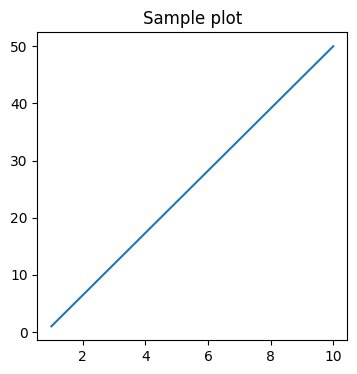

In [ ]:
x = np.array([1,10])
y = np.array([1,50])


fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, y)
ax.set_title("Sample plot")
plt.show()

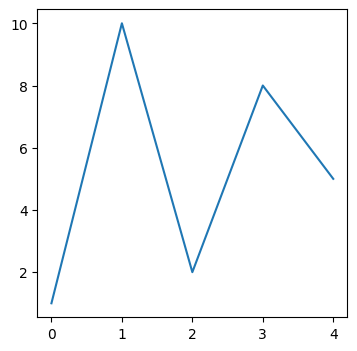

In [ ]:
plt.figure(figsize = (4,4))
y_pts = np.array([1,10,2,8,5])
plt.plot(y_pts)

Text(0.5, 1.0, 'Speed & Velocity')

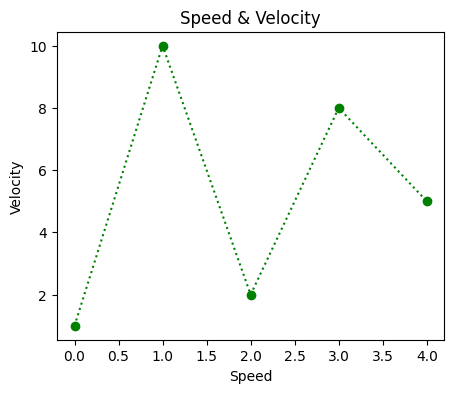

In [ ]:
plt.figure(figsize = (5,4))
y_pts = np.array([1,10,2,8,5])
plt.plot(y_pts, marker = "o", color = "green", linestyle = 'dotted')
plt.xlabel("Speed")
plt.ylabel("Velocity")
plt.title("Speed & Velocity")

In [ ]:
months = np.array(['January', 'February', 'March', 'April', 'May'])
sales_amt = np.array([2500, 3200, 2800, 4100, 3700])
colors = ['red','lime','cyan','aquamarine','pink']

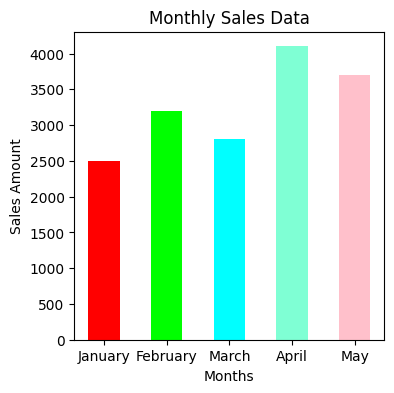

In [ ]:
import matplotlib.colors as mcolors
plt.figure(figsize = (4,4))
plt.bar(months, sales_amt, color = colors, width = 0.5)
plt.xlabel("Months")
plt.ylabel("Sales Amount")
plt.title("Monthly Sales Data")
plt.savefig('img.jpg')